In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

In [5]:
df = pd.read_excel(r"C:\Users\fattani computers\Downloads\archive\online_retail_II.xlsx", sheet_name="Year 2010-2011")


In [9]:
# View the first few rows
df.head()

# Dataset shape and column info
print(df.shape)
df.info()

# Check for missing values
df.isnull().sum()


(541910, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [10]:
# Drop rows with missing CustomerID or Description
df.dropna(subset=['Customer ID', 'Description'], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove canceled orders (Invoice starts with 'C')
df = df[~df['Invoice'].astype(str).str.startswith('C')]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Add a new 'TotalPrice' column
df['TotalPrice'] = df['Quantity'] * df['Price']

# Filter out rows with non-positive Quantity or Price
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]


In [11]:
print("Unique products:", df['Description'].nunique())
print("Total transactions:", df['Invoice'].nunique())
print("Unique customers:", df['Customer ID'].nunique())
print("Countries:", df['Country'].nunique())


Unique products: 3877
Total transactions: 18532
Unique customers: 4338
Countries: 37


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plotting
%matplotlib inline

# Set plot style
sns.set(style="whitegrid")

# Load the Excel file
df = pd.read_excel(r"C:\Users\fattani computers\Downloads\archive\online_retail_II.xlsx", sheet_name="Year 2010-2011")


# Preview the dataset
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
# Check basic info
df.info()

# Check missing values
missing = df.isnull().sum()
missing[missing > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Description      1454
Customer ID    135080
dtype: int64

In [15]:
# Dataset shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Column names
df.columns


Rows: 541910, Columns: 8


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [16]:
# Drop rows with missing Customer ID or Description
df.dropna(subset=['Customer ID', 'Description'], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove canceled orders (Invoice starting with 'C')
df = df[~df['Invoice'].astype(str).str.startswith('C')]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filter out rows with non-positive Quantity or Price
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

# Create 'TotalPrice' column
df['TotalPrice'] = df['Quantity'] * df['Price']


In [17]:
print("Unique Products:", df['Description'].nunique())
print("Total Transactions:", df['Invoice'].nunique())
print("Unique Customers:", df['Customer ID'].nunique())
print("Countries:", df['Country'].nunique())
print("Time Range:", df['InvoiceDate'].min(), "to", df['InvoiceDate'].max())


Unique Products: 3877
Total Transactions: 18532
Unique Customers: 4338
Countries: 37
Time Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


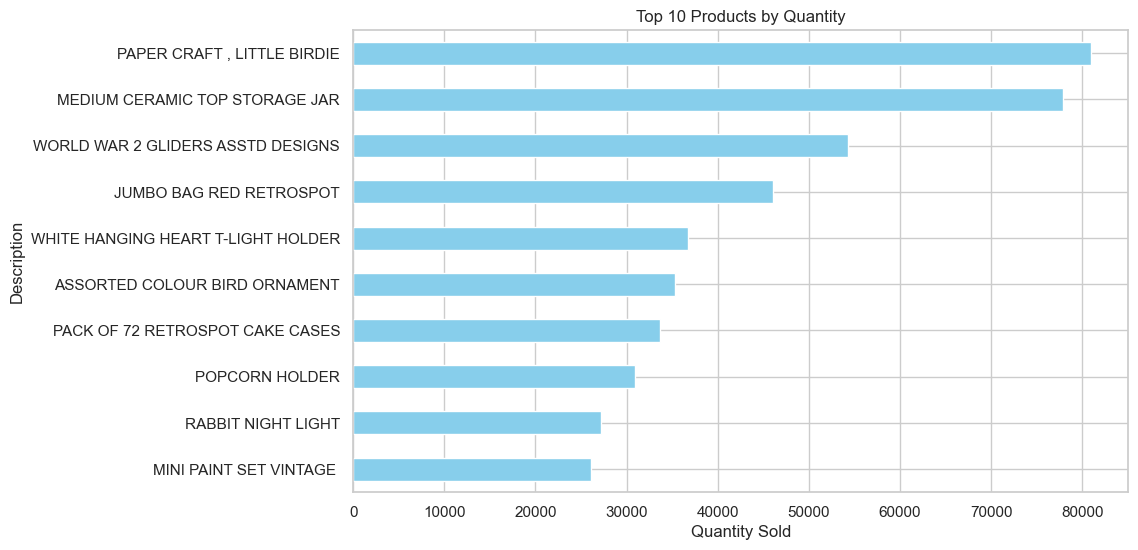

In [18]:
# Top 10 selling products by Quantity
top_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_quantity.plot(kind='barh', title='Top 10 Products by Quantity', figsize=(10,6), color='skyblue')
plt.xlabel('Quantity Sold')
plt.gca().invert_yaxis()
plt.show()


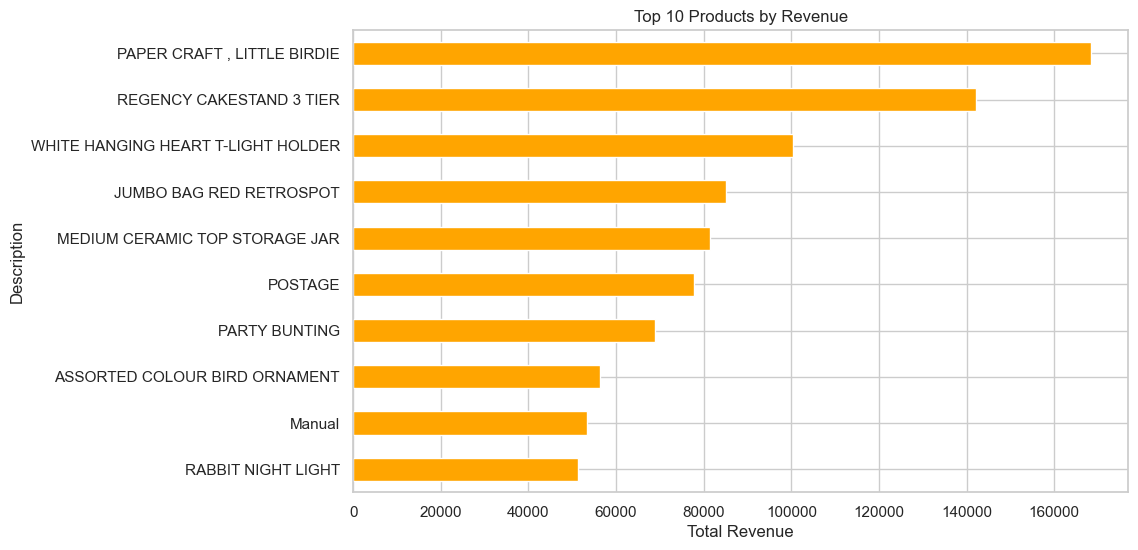

In [19]:
# Top 10 revenue-generating products
top_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_revenue.plot(kind='barh', title='Top 10 Products by Revenue', figsize=(10,6), color='orange')
plt.xlabel('Total Revenue')
plt.gca().invert_yaxis()
plt.show()


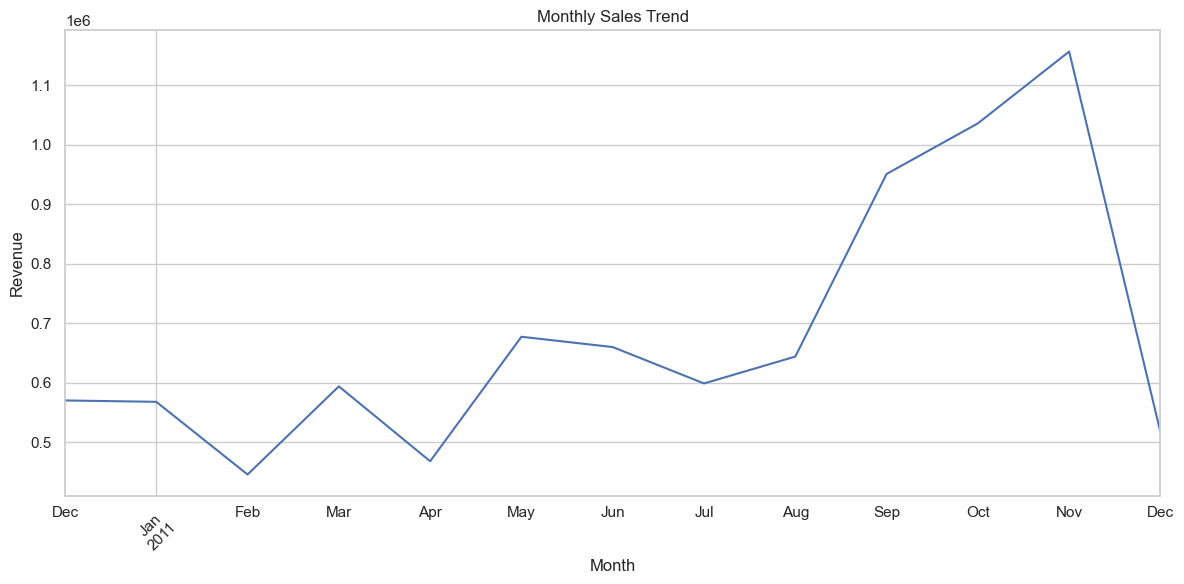

In [20]:
# Monthly sales trend
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()

monthly_sales.plot(kind='line', figsize=(12,6), title='Monthly Sales Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


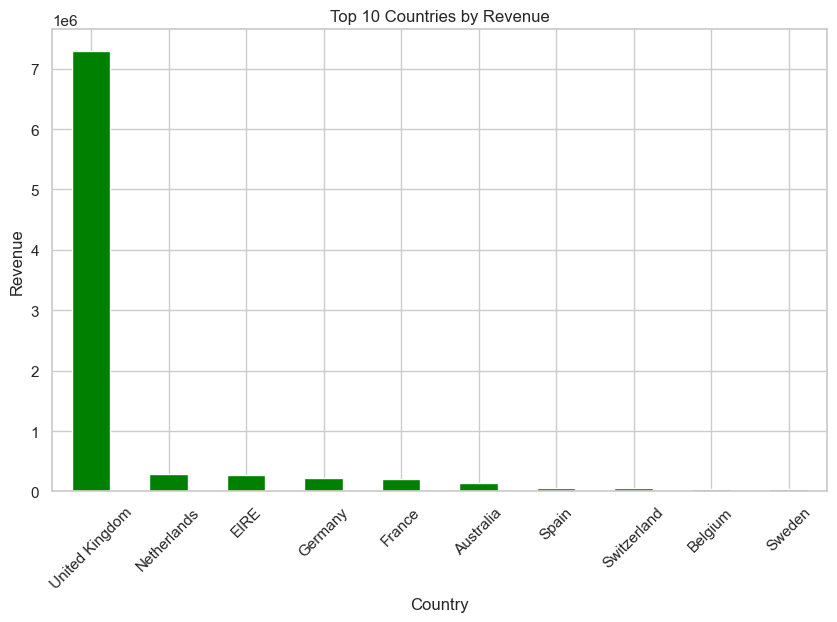

In [21]:
# Total revenue per country
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
country_revenue.plot(kind='bar', title='Top 10 Countries by Revenue', figsize=(10,6), color='green')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


In [22]:
# Create snapshot date
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Group by customer
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
})

# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

# Display top 5
rfm.head()


,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [10]:
import pandas as pd

# Load your Excel dataset (adjust path if needed)
df = pd.read_excel(r"C:\users\fattani computers\Downloads\archive\online_retail_II.xlsx", sheet_name="Year 2010-2011")

# Drop missing values and preprocess
df.dropna(subset=["Customer ID", "Description"], inplace=True)
df = df[~df["Invoice"].astype(str).str.startswith("C")]  # Remove cancelled orders
df = df[(df["Quantity"] > 0) & (df["Price"] > 0)]
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])



In [11]:
# Add TotalPrice column
df["TotalPrice"] = df["Quantity"] * df["Price"]

# Snapshot date = 1 day after last purchase
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

# Group and compute RFM
rfm = df.groupby("Customer ID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "Invoice": "nunique",
    "TotalPrice": "sum"
}).reset_index()

# Rename columns
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]


In [12]:
r_labels = [5, 4, 3, 2, 1]
f_labels = m_labels = [1, 2, 3, 4, 5]

rfm["R_Score"] = pd.qcut(rfm["Recency"], q=5, labels=r_labels)
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), q=5, labels=f_labels)
rfm["M_Score"] = pd.qcut(rfm["Monetary"], q=5, labels=m_labels)

rfm["RFM_Segment"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)
rfm["RFM_Score"] = rfm[["R_Score", "F_Score", "M_Score"]].astype(int).sum(axis=1)

def segment_customer(score):
    if score >= 12:
        return "🎖️ Champions"
    elif score >= 9:
        return "💎 Loyal"
    elif score >= 6:
        return "🙂 Potential"
    else:
        return "⚠️ At Risk"

rfm["Segment"] = rfm["RFM_Score"].apply(segment_customer)


In [14]:
# Step 1: Score each RFM metric (1 = worst, 5 = best)
r_labels = [5, 4, 3, 2, 1]  # Lower recency is better
f_labels = m_labels = [1, 2, 3, 4, 5]  # Higher freq/monetary is better

rfm["R_Score"] = pd.qcut(rfm["Recency"], q=5, labels=r_labels)
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), q=5, labels=f_labels)
rfm["M_Score"] = pd.qcut(rfm["Monetary"], q=5, labels=m_labels)

# Step 2: Create combined RFM Segment
rfm["RFM_Segment"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)
rfm["RFM_Score"] = rfm[["R_Score", "F_Score", "M_Score"]].astype(int).sum(axis=1)

# Step 3: Define customer segments
def segment_customer(rfm_score):
    if rfm_score >= 12:
        return "🎖️ Champions"
    elif rfm_score >= 9:
        return "💎 Loyal"
    elif rfm_score >= 6:
        return "🙂 Potential"
    else:
        return "⚠️ At Risk"

rfm["Segment"] = rfm["RFM_Score"].apply(segment_customer)

# View result
print("🎯 RFM Segmentation Summary:\n")
print(rfm["Segment"].value_counts())

# Optional: show top champions
print("\n🏆 Top Champion Customers:")
rfm[rfm["Segment"] == "🎖️ Champions"].sort_values("RFM_Score", ascending=False).head()

🎯 RFM Segmentation Summary:

🎖️ Champions    1255
🙂 Potential     1178
💎 Loyal         1022
⚠️ At Risk       883
Name: Segment, dtype: int64

🏆 Top Champion Customers:


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Segment
1,12347.0,2,7,4310.00,5,5,5,555,15,🎖️ Champions
1959,15033.0,5,10,2586.67,5,5,5,555,15,🎖️ Champions
1847,14868.0,3,8,2953.59,5,5,5,555,15,🎖️ Champions
1867,14895.0,8,20,11138.71,5,5,5,555,15,🎖️ Champions
1876,14907.0,3,7,3501.10,5,5,5,555,15,🎖️ Champions


In [15]:
# Export cleaned transactional data
df.to_csv("Cleaned_Online_Retail.csv", index=False)

# Optional: Export RFM table
rfm.to_csv("RFM_Segmentation.csv")